In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [6]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [4]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [5]:
from sklearn.decomposition import PCA

### Your code is here

pca = PCA(n_components = 2)
pca.fit(X_centered).explained_variance_ratio_

array([0.63176117, 0.21129863])

In [6]:
pca_dataset = pca.fit_transform(X_centered)
pca_dataset = pd.DataFrame(data = pca_dataset, columns = ['PCA_1', 'PCA_2'])

In [7]:
pca_dataset

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752
...,...,...
131657,-32.267779,-2.482906
131658,32.621206,-0.886322
131659,-4.045367,-1.565545
131660,3.696395,-15.487904


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [8]:
X_centered

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,-32.480909,-5.015912,-0.059158,0.435542,-0.782838,-1.474883,-4.2028,0.900981,-0.389983,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
131658,30.609091,0.984088,0.009142,-2.404458,-0.782838,-1.474883,11.7972,12.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
131659,-4.030909,3.984088,0.194202,0.486792,-0.782838,-1.474883,-3.2028,-0.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
131660,2.679091,-2.015912,0.245992,1.308042,0.217162,-15.474883,2.7972,3.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [9]:
new_data = pd.concat((X_centered, pca_dataset), axis = 1)
first_col_corr = new_data.corr().loc['PCA_1']
second_col_corr = new_data.corr().loc['PCA_2']
corrs = pd.concat((first_col_corr, second_col_corr),axis = 1)
corrs

,PCA_1,PCA_2
Trip_Distance,9.977669e-01,1.840976e-02
Customer_Since_Months,1.215905e-01,3.500242e-03
Life_Style_Index,4.806582e-01,-2.590075e-02
Customer_Rating,-7.010414e-02,-3.757209e-03
Cancellation_Last_1Month,8.028412e-04,8.959674e-03
Var1,-4.853234e-02,9.986005e-01
Var2,2.471780e-01,-2.844822e-02
Var3,2.938188e-01,-2.658334e-02
Type_of_Cab_B,-4.875054e-02,5.723493e-03
Type_of_Cab_C,-1.205864e-02,-3.397434e-03


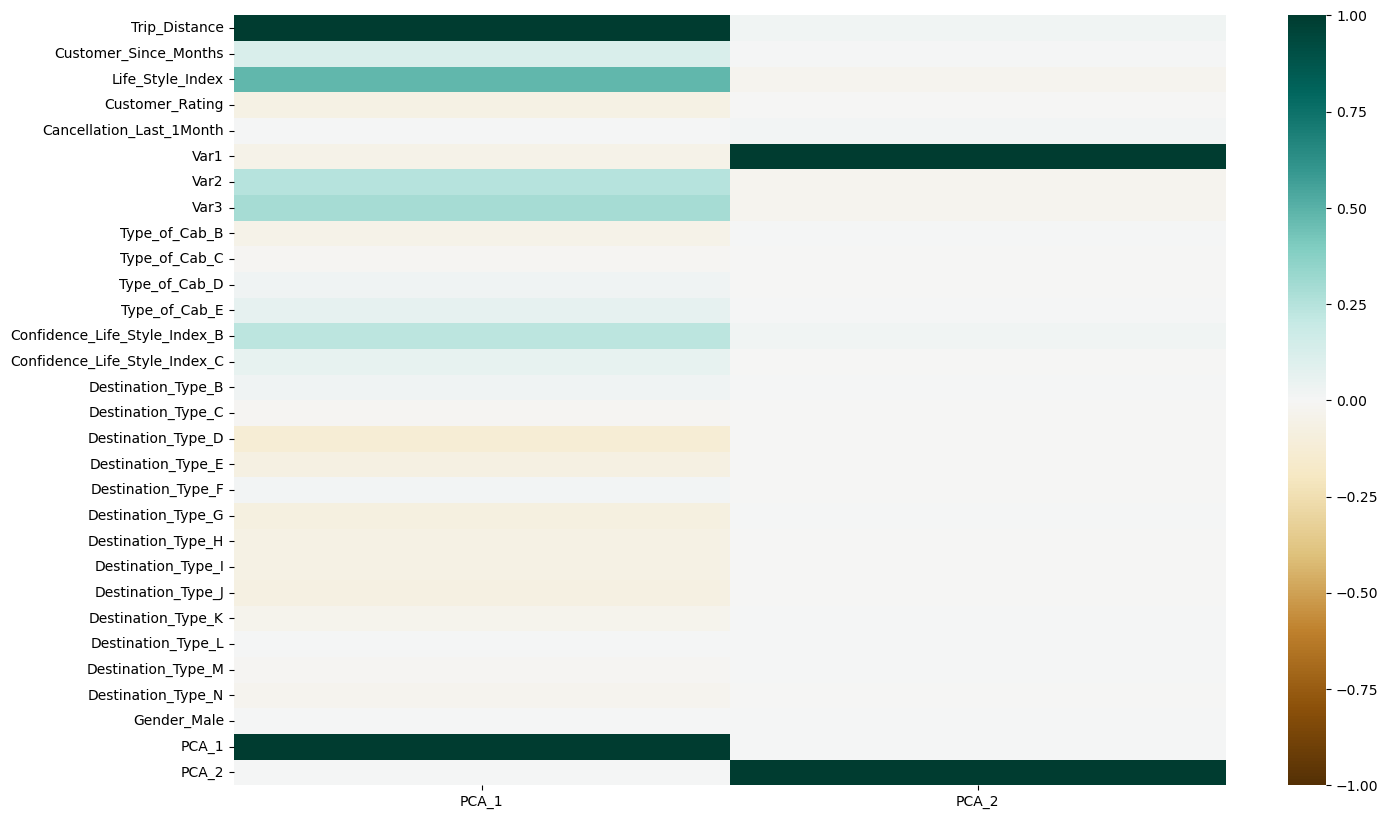

In [10]:
### Your code is here
fig = plt.figure()
fig.set_size_inches(16,10)
sns.heatmap(corrs,
           xticklabels = corrs.columns,
           yticklabels = corrs.index,
           cmap = 'BrBG',
           vmin = -1,
           vmax = 1)
plt.show()

In [11]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(data.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlation(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]
    
print('Top Absolute Correlations')
print(get_top_abs_correlation(new_data,10))

Top Absolute Correlations
Var1                           PCA_2                            0.998600
Trip_Distance                  PCA_1                            0.997767
Var2                           Var3                             0.683437
Confidence_Life_Style_Index_B  Confidence_Life_Style_Index_C    0.565692
Life_Style_Index               PCA_1                            0.480658
Trip_Distance                  Life_Style_Index                 0.468332
Type_of_Cab_B                  Type_of_Cab_C                    0.416698
                               Type_of_Cab_D                    0.328262
Life_Style_Index               Var3                             0.303324
Customer_Rating                Var2                             0.302968
dtype: float64


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [12]:
PCA_dataset = np.concatenate((pca_dataset.values, y.values.reshape(-1,1)), axis = 1)
PCA_dataset = pd.DataFrame(PCA_dataset, columns = ['PCA_1','PCA_2','SEGMENT'])
PCA_dataset

,PCA_1,PCA_2,SEGMENT
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0
...,...,...,...
131657,-32.267779,-2.482906,3.0
131658,32.621206,-0.886322,2.0
131659,-4.045367,-1.565545,2.0
131660,3.696395,-15.487904,2.0


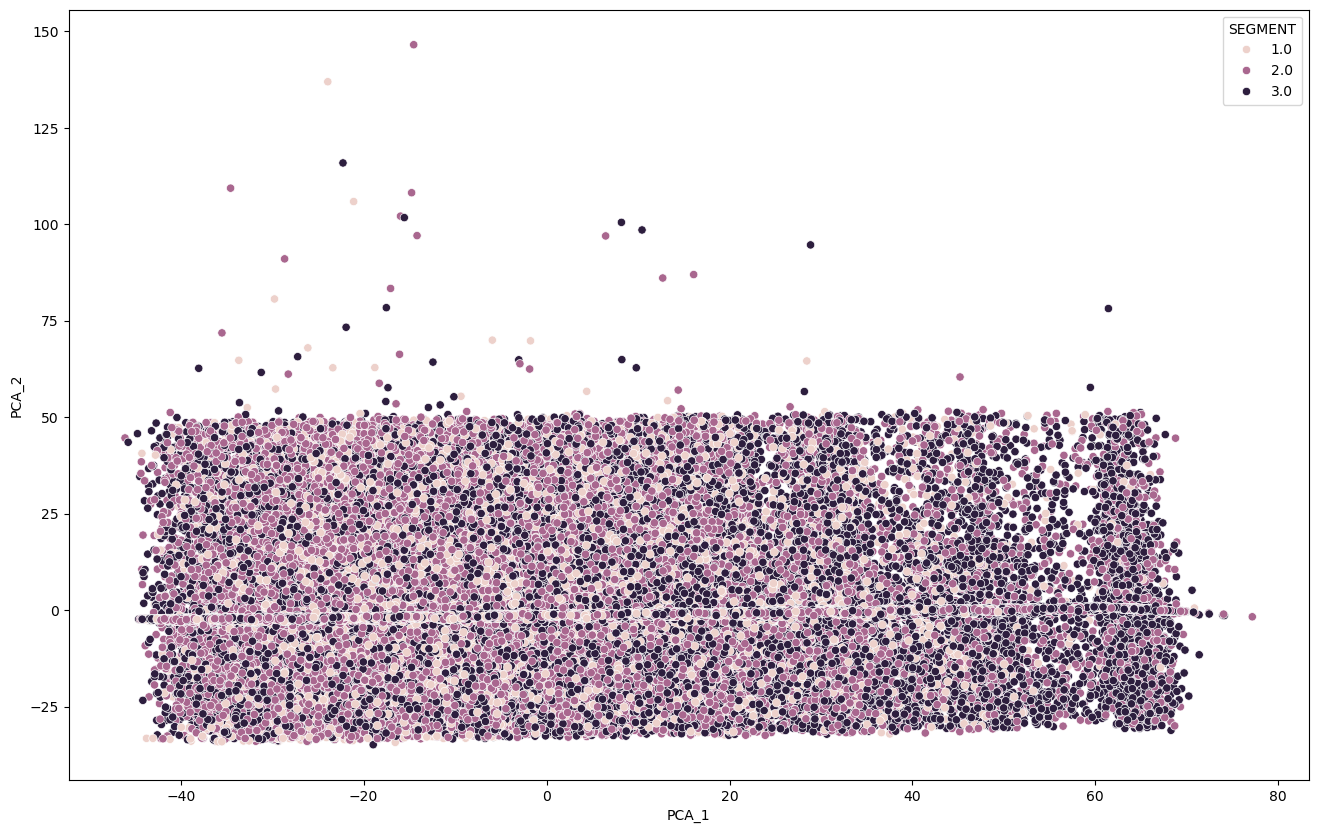

In [13]:
### Your code is here
fig = plt.figure()
fig.set_size_inches(16,10)
sns.scatterplot(data = PCA_dataset, x = 'PCA_1', y = 'PCA_2', hue = 'SEGMENT')
plt.show()

In [14]:
pca = PCA(n_components = 3)
pca_dataset = pca.fit_transform(X_centered)
pca_dataset = pd.DataFrame(pca_dataset, columns = ['PCA_1','PCA_2','PCA_3'])
PCA_dataset

,PCA_1,PCA_2,SEGMENT
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0
...,...,...,...
131657,-32.267779,-2.482906,3.0
131658,32.621206,-0.886322,2.0
131659,-4.045367,-1.565545,2.0
131660,3.696395,-15.487904,2.0


In [15]:
new_data = pd.concat((X_centered, pca_dataset), axis = 1)
print('Top Absolute Correlations')
print(get_top_abs_correlation(new_data,10))

Top Absolute Correlations
Var1                           PCA_2                            0.998600
Trip_Distance                  PCA_1                            0.997767
Var3                           PCA_3                            0.951081
Var2                           PCA_3                            0.705159
                               Var3                             0.683437
Confidence_Life_Style_Index_B  Confidence_Life_Style_Index_C    0.565692
Life_Style_Index               PCA_1                            0.480658
Trip_Distance                  Life_Style_Index                 0.468332
Type_of_Cab_B                  Type_of_Cab_C                    0.416698
                               Type_of_Cab_D                    0.328262
dtype: float64


In [16]:
PCA_dataset = np.concatenate((pca_dataset.values, y.values.reshape(-1,1)), axis = 1)
PCA_dataset = pd.DataFrame(PCA_dataset, columns = ['PCA_1','PCA_2','PCA_3', 'SEGMENT'])

In [17]:
PCA_dataset.nunique()

PCA_1      131662
PCA_2      131662
PCA_3      131662
SEGMENT         3
dtype: int64

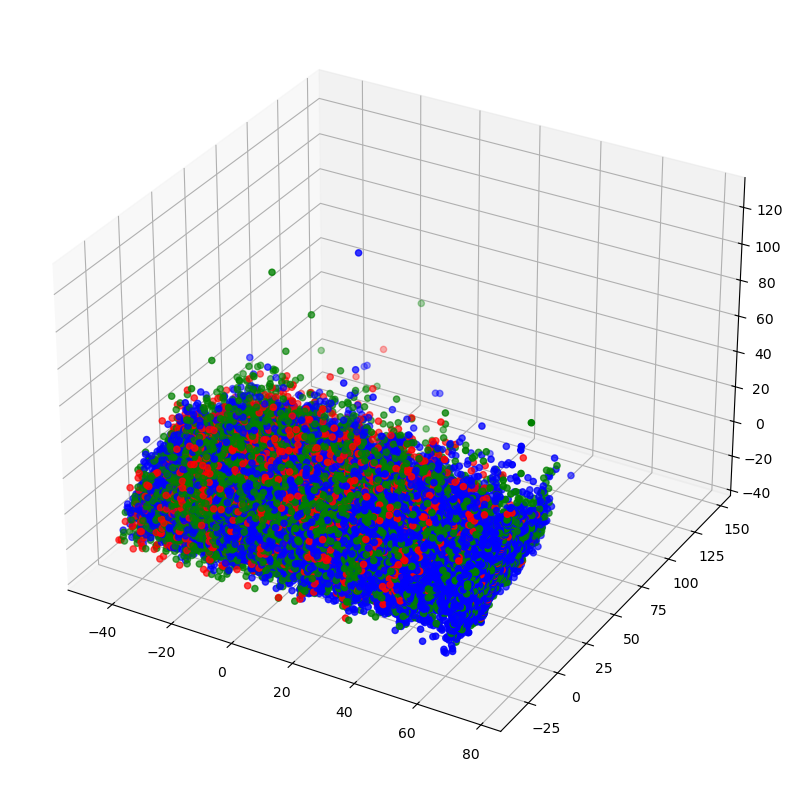

In [18]:
fig = plt.figure()
fig.set_size_inches(16,10)
ax = plt.axes(projection = '3d')
colors = PCA_dataset['SEGMENT'].replace([1.0,2.0,3.0], ['red', 'green', 'blue'])
ax.scatter3D(PCA_dataset['PCA_1'],
             PCA_dataset['PCA_2'],
             PCA_dataset['PCA_3'],
             c = colors)
plt.show()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [19]:
### Your code is here





**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [20]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [23]:
### Your code is here
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}
pipe1 = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components = 2)),
                ('model', LogisticRegression())])
search1 = GridSearchCV(pipe1, param_grid)
search1.fit(X_train, y_train)
print(classification_report(y_test,search1.predict(X_test), digits = 3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.692     0.566     11349
           3      0.494     0.509     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [24]:
pipe2 = Pipeline([('scaler', StandardScaler()),
                ('model', LogisticRegression())])
search2 = GridSearchCV(pipe2, param_grid)
search2.fit(X_train, y_train)
print(classification_report(y_test,search2.predict(X_test), digits = 3))

              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [25]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [26]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy_dict[n_components], f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)
    

AttributeError: 'float' object has no attribute 'round'

In [27]:
print(round(f1_score_dict[28],3))

0.676


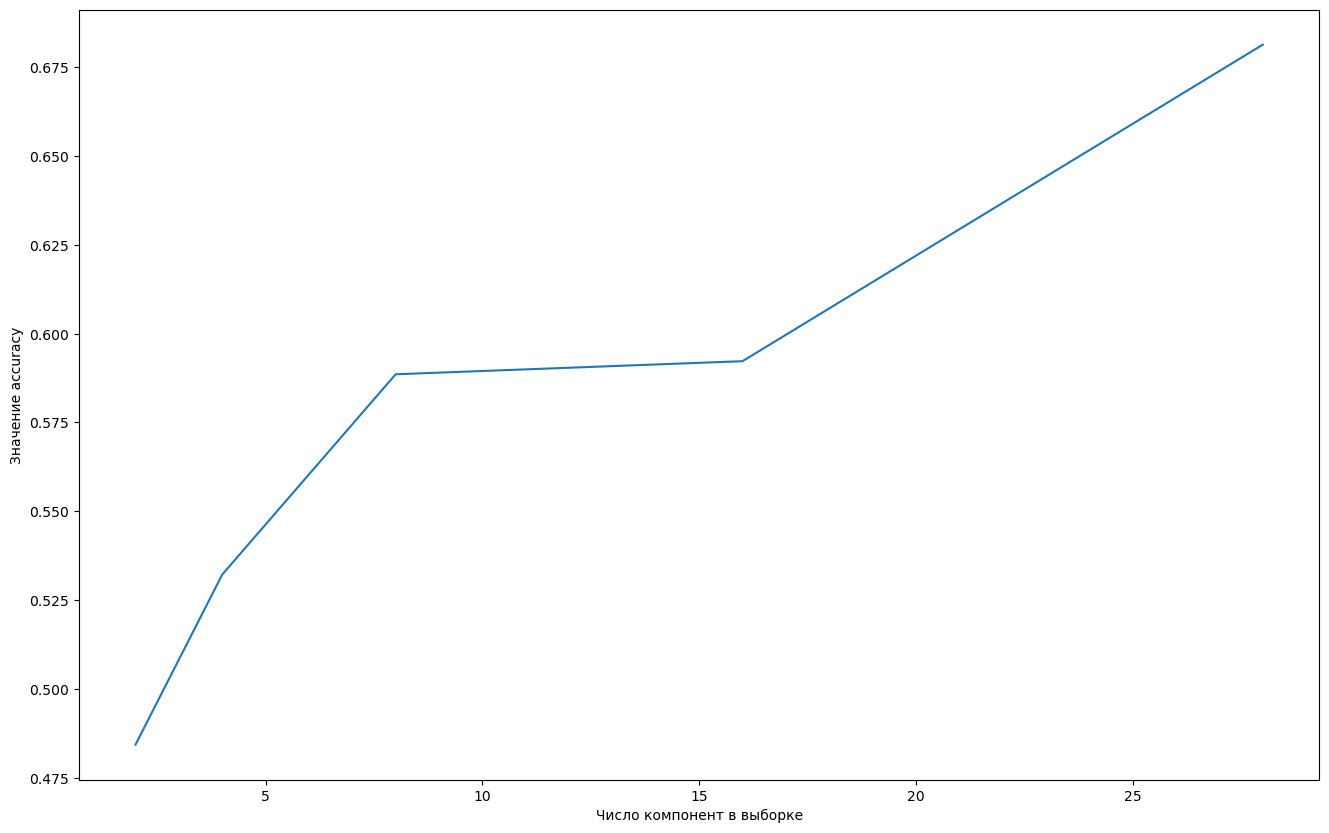

In [34]:
fig = plt.figure()
fig.set_size_inches(16,10)
plt.plot(components_list, accuracy_dict.values())
plt.xlabel('Число компонент в выборке')
plt.ylabel('Значение accuracy')
plt.show()

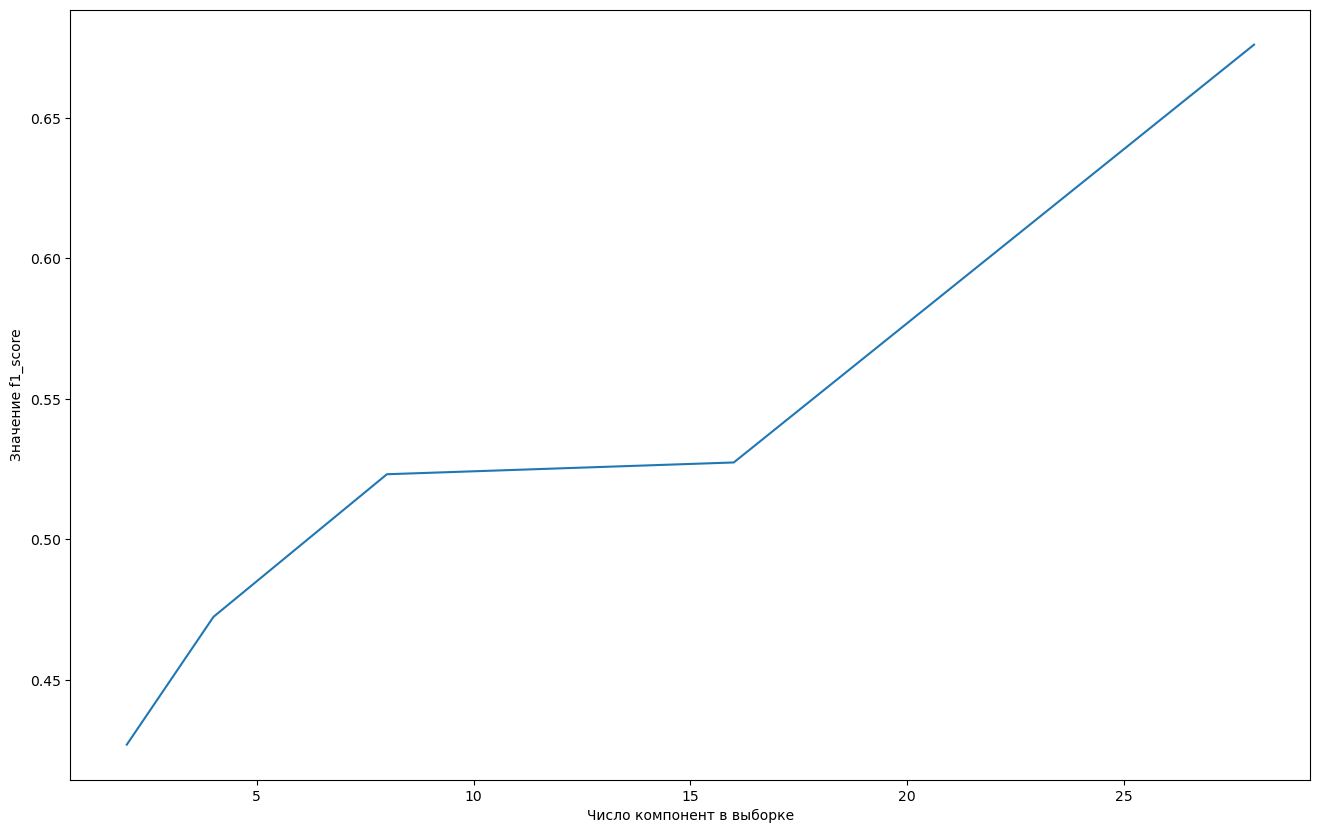

In [35]:
fig = plt.figure()
fig.set_size_inches(16,10)
plt.plot(components_list, f1_score_dict.values())
plt.xlabel('Число компонент в выборке')
plt.ylabel('Значение f1_score')
plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [11]:
from sklearn.manifold import TSNE

X_tsne = X.head(2000)
X_tsne = TSNE(n_components=2).fit_transform(X_tsne)
X_tsne = np.concatenate((X_tsne, y.head(2000).values.reshape(-1,1)), axis = 1)
data = pd.DataFrame(data = X_tsne, columns = ['TSNE1', 'TSNE2', 'SEGMENT'])
data
### Your code is here



,TSNE1,TSNE2,SEGMENT
0,-20.837664,-10.152955,2.0
1,-8.365729,-10.106830,2.0
2,12.475842,-2.386687,2.0
3,25.808615,-12.366309,3.0
4,16.129103,5.395453,2.0
...,...,...,...
1995,49.442822,-0.324774,3.0
1996,0.866884,-32.713131,3.0
1997,-12.084340,-4.204254,2.0
1998,-13.527068,42.637417,2.0


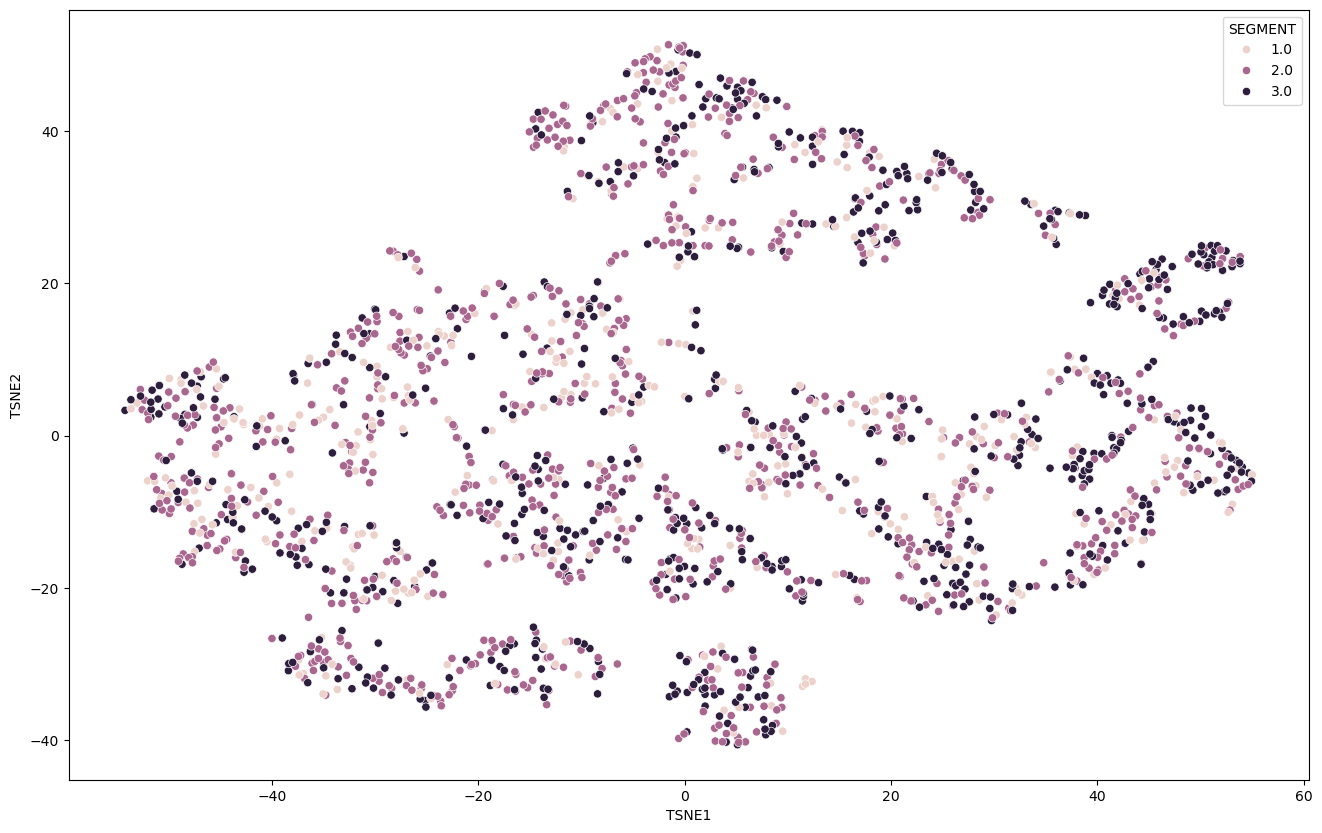

In [12]:
fig = plt.figure()
fig.set_size_inches(16,10)
sns.scatterplot(data = data, x = 'TSNE1', y = 'TSNE2', hue = 'SEGMENT')
plt.show()

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [13]:
### Your code is here

X_tsne = X.head(2000)
X_tsne = TSNE(n_components = 3).fit_transform(X_tsne)
X_tsne = np.concatenate((X_tsne, y.head(2000).values.reshape(-1,1)), axis = 1)
data = pd.DataFrame(data = X_tsne, columns = ['TSNE1','TSNE2','TSNE3','SEGMENT'])
data

,TSNE1,TSNE2,TSNE3,SEGMENT
0,-7.409397,-7.234789,7.866551,2.0
1,-2.176359,-4.844615,7.374212,2.0
2,-0.968539,-2.422859,-2.610003,2.0
3,7.672105,-4.100488,-3.939111,3.0
4,4.030602,-1.617018,2.175808,2.0
...,...,...,...,...
1995,14.385318,0.980925,0.900418,3.0
1996,-0.764365,-2.833806,-7.201064,3.0
1997,-4.393750,-2.821696,8.648735,2.0
1998,-5.566625,11.147538,-1.348097,2.0


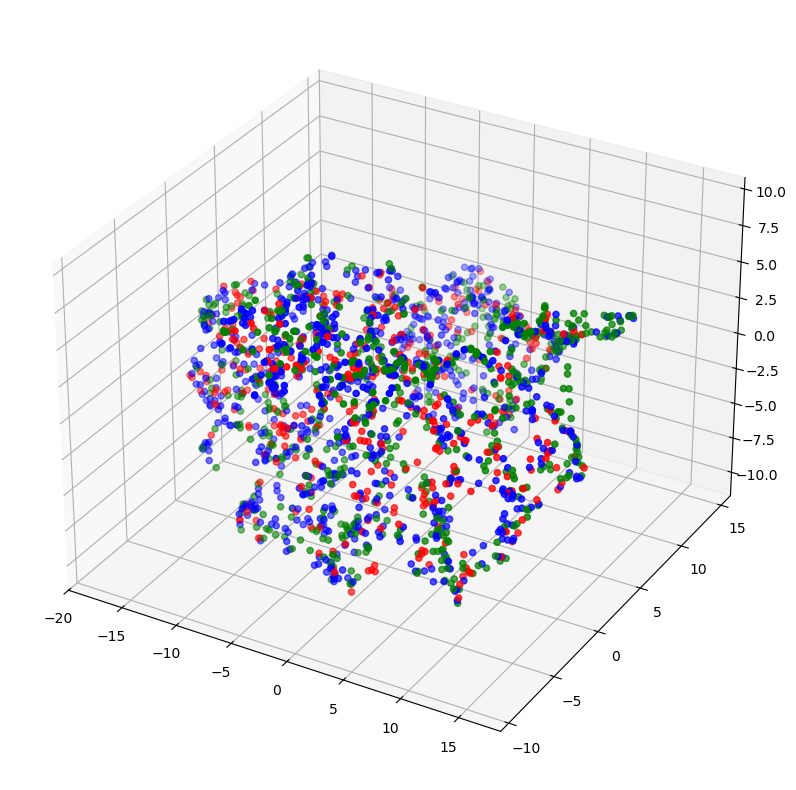

In [14]:
fig = plt.figure()
fig.set_size_inches(16,10)
ax = plt.axes(projection = '3d')
colors = data['SEGMENT'].replace([1.0,2.0,3.0], ['red', 'blue', 'green'])
data['TSNE1'] = data['TSNE1'].astype('float64')
data['TSNE2'] = data['TSNE2'].astype('float64')
data['TSNE3'] = data['TSNE3'].astype('float64')

ax.scatter3D(data['TSNE1'],
            data['TSNE2'],
            data['TSNE3'],
            c = colors)
plt.show()

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!